# Data Science com Python

### Análise Exploratória de Dados

Prof.: Lucas Roberto Correa

LEMBRETE: Fazer o import dos datasets usados no ambiente do colab antes de executar os comandos.

### Import de pacotes

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 2.9 MB/s 


In [ ]:
import sweetviz as sv

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from IPython import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 10000)

### Import da base

Fonte dos dados: https://www.kaggle.com/rashmiranu/banking-dataset-classification?select=new_train.csv

In [ ]:
metadata = pd.read_excel('metadata.xlsx')

In [ ]:
metadata

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [ ]:
df = pd.read_csv('new_train.csv', sep=',')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
# Explorar o output da biblioteca sweetviz em uma outra janela, com análise descritiva e gráficos dos dados disponíveis

report = sv.analyze(df)

report.show_html('Analise.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analise.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Estatísticas básicas

In [ ]:
# Método 'info' retorna diversas informações relacionadas ao Dataframe, dentre elas número, indexação e disposição das variáveis nas colunas, número de valores não-nulos e tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
# Número de linhas e colunas do Dataframe

df.shape

(32950, 16)

In [ ]:
# Função len (length) para Dataframes retorna o número de linhas

len(df)

32950

In [ ]:
# Método nunique retorna os valores únicos para cada variável (análogo ao "remover duplicadas no Excel"). Neste exemplo, podemos ver que o banco de dados engloba consumidores com 75 idades diferentes

df.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

### Análise Univariada

In [ ]:
# Retornar as 5 primeiras linhas do Dataframe (5 é o default, é possível alterar esse número adicionando o número de linhas desejadas dentro dos parênteses)

df['age'].head()

0    49
1    37
2    78
3    36
4    59
Name: age, dtype: int64

In [ ]:
# Retornar as 5 últimas linhas do Dataframe (mesmo default do 'head')

df['age'].tail()

32945    28
32946    52
32947    54
32948    29
32949    35
Name: age, dtype: int64

In [ ]:
# Soma de todos os valores de uma coluna (no caso, coluna "age")

df['age'].sum()

1318465

In [ ]:
# Valor mínimo observado para determinada coluna

df['age'].min()

17

In [ ]:
# Valor médio

df['age'].mean()

40.01411229135053

In [ ]:
# Valor máximo

df['age'].max()

98

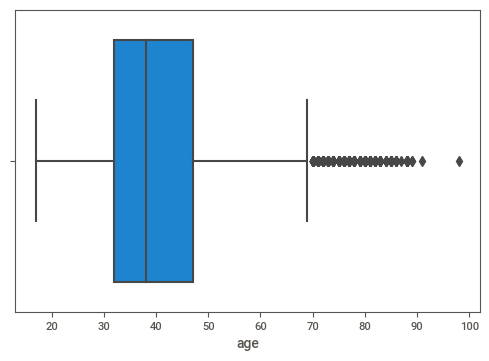

In [ ]:
# Boxplot dos dados referentes à coluna "Age". É possível observar onde estão dispostos os valores "mínimos" e "máximos", Q1, mediana (Q2), Q3 e potenciais outliers (valores discrepantes na distribuição dos dados, usualmente definidos baseados no valor do interquartil)

sns.boxplot(x=df["age"])

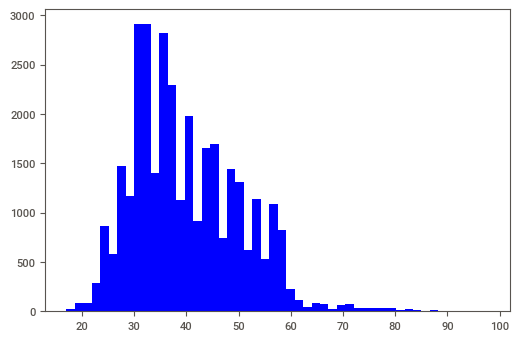

In [ ]:
# O histograma também facilita a visualização da distribuição dos dados, fundamental na escolha de testes estatísticos corretos (distribuição normal ou não)

plt.hist(df['age'], 50, facecolor='b')
plt.show()

#### Medidas descritivas básicas

In [ ]:
df.describe(include='int64')

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


### Análise de missings

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Tabela de Frequencia

In [ ]:
df['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     20908
telephone    12042
Name: contact, dtype: int64

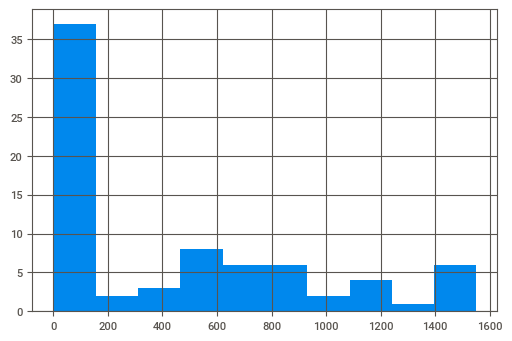

In [ ]:
df['age'].value_counts().hist()

In [ ]:
prev_y = pd.crosstab(index=df["previous"], columns=df["y"],margins=True)
prev_y

y,no,yes,All
previous,,,
0,25915,2501,28416
1,2889,784,3673
2,324,282,606
3,74,101,175
4,29,31,60
5,4,10,14
6,2,3,5
7,1,0,1
All,29238,3712,32950


In [ ]:
job_y = pd.crosstab(index=df["job"], columns=df["y"],margins=True)
job_y

y,no,yes,All
job,,,
admin.,7244,1070,8314
blue-collar,6926,515,7441
entrepreneur,1060,100,1160
housemaid,769,86,855
management,2076,269,2345
retired,1018,348,1366
self-employed,980,119,1099
services,2942,254,3196
student,494,217,711


### Histograma

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

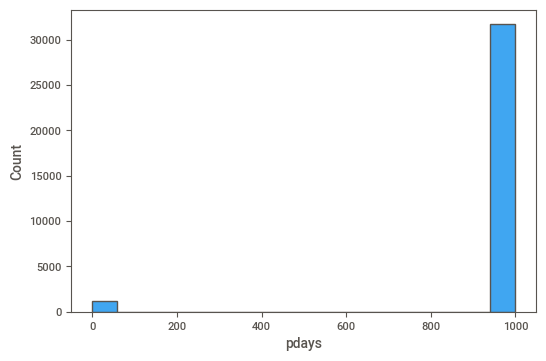

In [ ]:
sns.histplot(data=df, x="pdays")

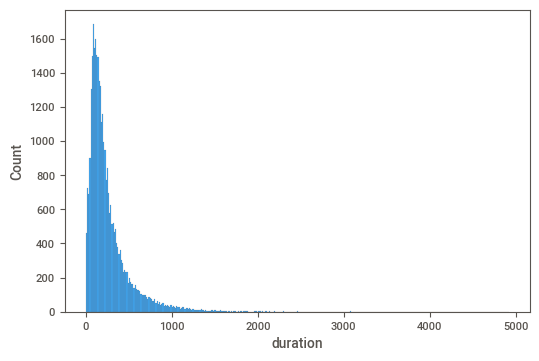

In [ ]:
sns.histplot(data=df, x="duration")

In [ ]:
df['duration'].describe()

count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
df['duration'].median()

180.0

In [ ]:
df['duration'].mode()

0    90
dtype: int64

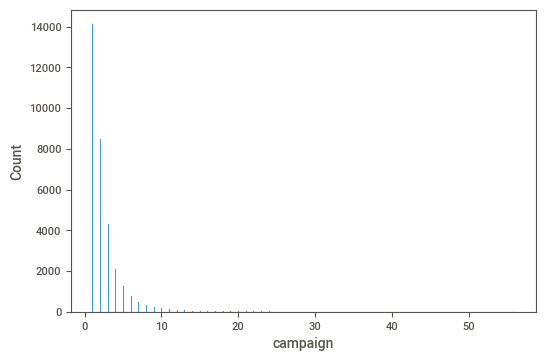

In [ ]:
sns.histplot(data=df, x="campaign")

### Boxplot

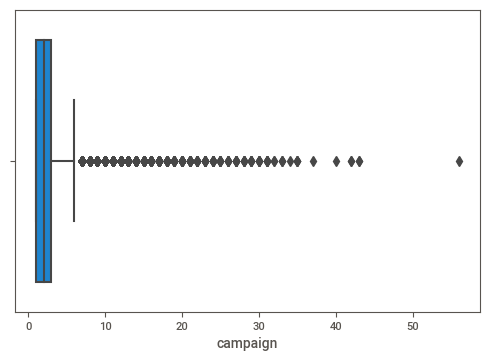

In [ ]:
sns.boxplot(x=df["campaign"])

In [ ]:
df['campaign'].value_counts()

1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

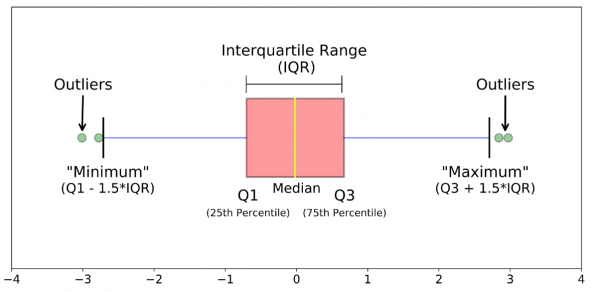

In [ ]:
display.Image("IQR.png")

### Grafico de Dispersão

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

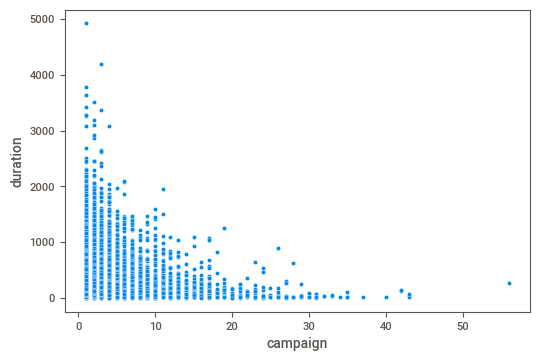

In [ ]:
sns.scatterplot(data=df, x="campaign", y="duration")

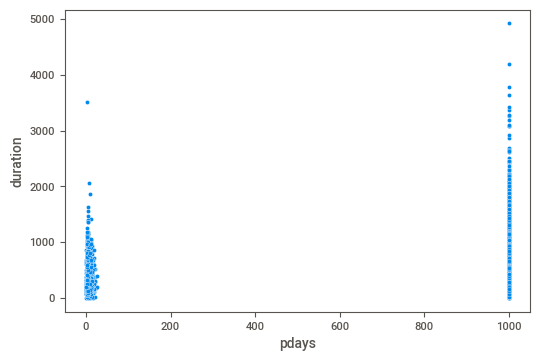

In [ ]:
sns.scatterplot(data=df, x="pdays", y="duration")

### Correlações

In [ ]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


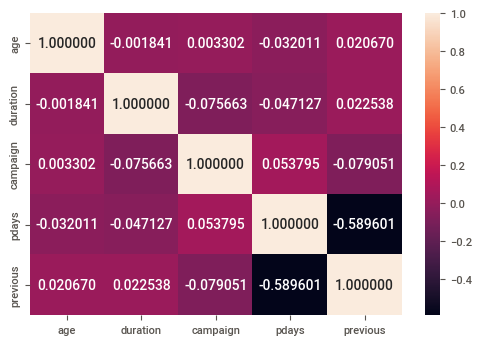

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt="f")

### Plot de variáveis categoricas

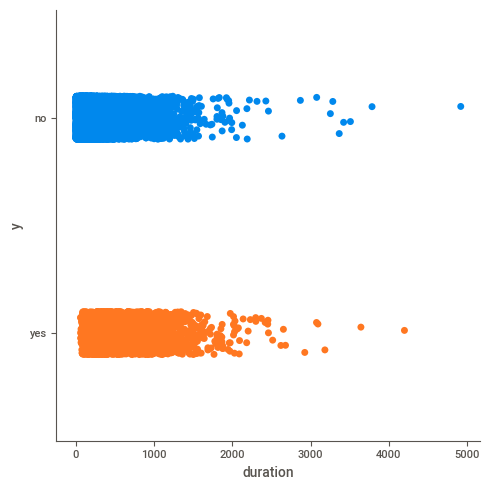

In [ ]:
sns.catplot(x="duration", y="y", data=df)

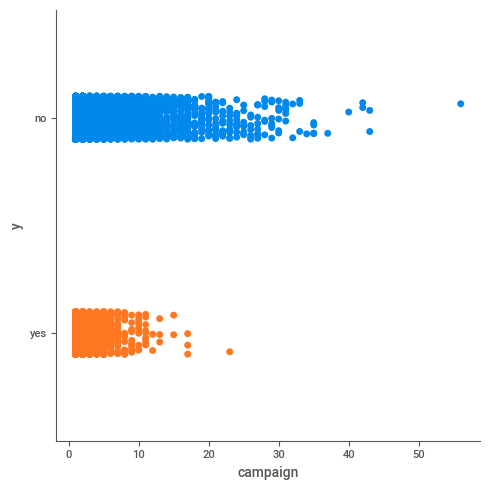

In [ ]:
sns.catplot(x="campaign", y="y", data=df)

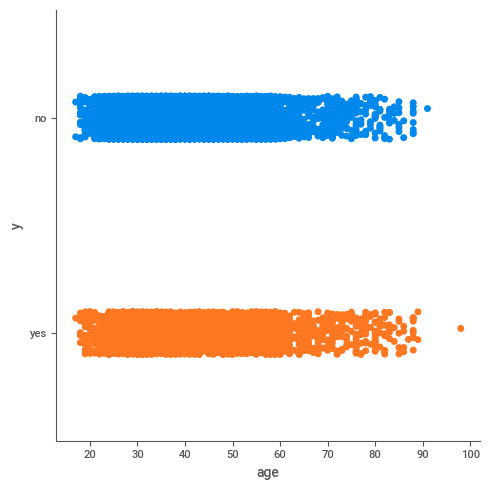

In [ ]:
sns.catplot(x="age", y="y", data=df)

### Análise Multivariada

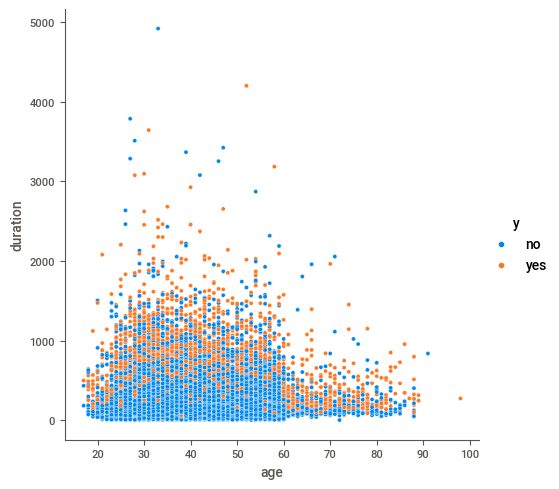

In [ ]:
sns.relplot(x="age", y="duration", hue="y", data=df);

Análise de Componentes Principais - PCA no contexto de Análise Multivariada

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
metadata

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [ ]:
df_pca = df[['age', 'duration','campaign','pdays','previous']]

In [ ]:
df_pca.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [ ]:
pca = PCA(n_components=2, random_state=42)

In [ ]:
df_expl_pca = StandardScaler().fit_transform(df_pca)

In [ ]:
df_expl_pca

array([[ 0.86373877, -0.12019627,  0.52298128,  0.19658384, -0.35012691],
       [-0.28972159, -0.2167318 , -0.20368791,  0.19658384,  1.65381294],
       [ 3.65126795,  3.43617293, -0.56702251,  0.19658384, -0.35012691],
       ...,
       [ 1.34434725, -0.49089273,  0.52298128,  0.19658384, -0.35012691],
       [-1.05869515, -0.3596044 , -0.56702251,  0.19658384, -0.35012691],
       [-0.48196498,  1.10387435,  0.15964669,  0.19658384, -0.35012691]])

In [ ]:
result_pca = pca.fit_transform(df_expl_pca)

result_pca_df = pd.DataFrame(result_pca,
                            columns=['component1','component2'])
result_pca_df

,component1,component2
0,-0.425175,-0.509855
1,1.005371,-0.146158
2,0.265589,2.274575
3,-0.421084,-0.115342
4,-0.197363,0.194940
...,...,...
32945,-0.379635,0.451884
32946,1.095991,-0.530097
32947,-0.433674,-0.855301
32948,-0.384307,0.361312


O quanto eu estou conseguindo explicar da variabilidade dos dados?

In [ ]:
pca.explained_variance_ratio_

array([0.32246681, 0.2116934 ])

In [ ]:
df_resp_pca = pd.concat([df['y'], result_pca_df], axis=1)
df_resp_pca

,y,component1,component2
0,no,-0.425175,-0.509855
1,no,1.005371,-0.146158
2,yes,0.265589,2.274575
3,no,-0.421084,-0.115342
4,no,-0.197363,0.194940
...,...,...,...
32945,no,-0.379635,0.451884
32946,no,1.095991,-0.530097
32947,no,-0.433674,-0.855301
32948,no,-0.384307,0.361312


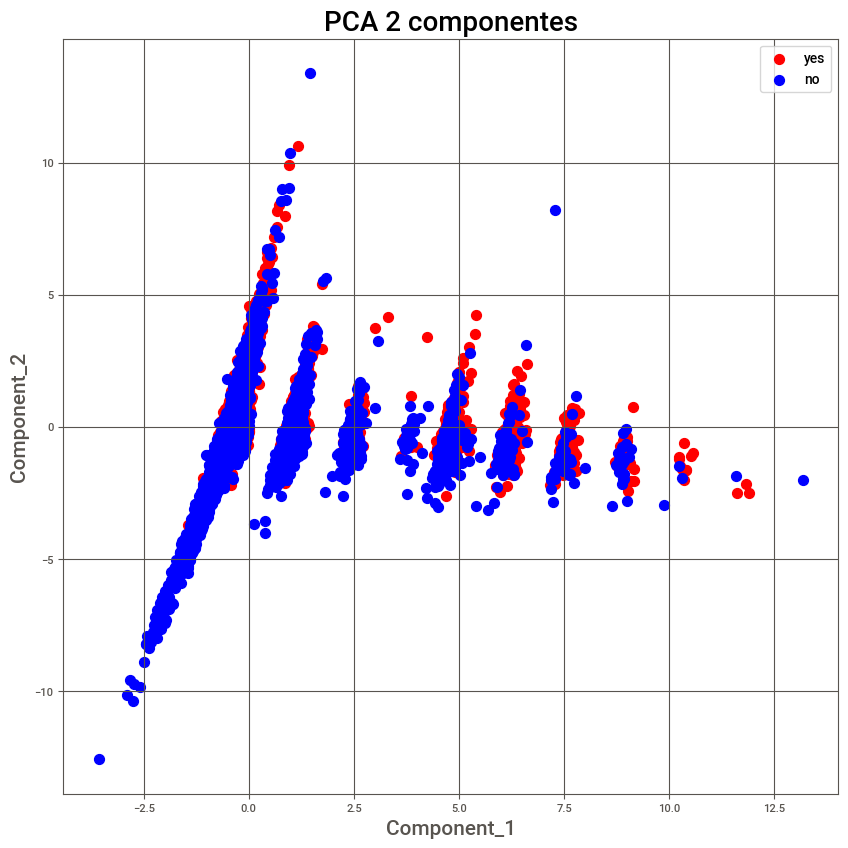

In [ ]:
fig = plt.figure(figsize= (10,10))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Component_1', fontsize = 15)
ax.set_ylabel('Component_2', fontsize = 15)
ax.set_title('PCA 2 componentes', fontsize = 20)
targets = ['yes','no']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_resp_pca['y'] == target
    ax.scatter(df_resp_pca.loc[indicesToKeep, 'component1']
               , df_resp_pca.loc[indicesToKeep, 'component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()